# Predictions of Powerlifting Totals Using Machine Learning 

## INFO 1998 Spring '25 Final Project

## Rishik Gowrishetti

__Introduction__

Powerlifting is a sport which involves attempting to attain the best total in the squat, bench, and deadlift in a meet.

The following project will attempt to predict an athlete's total (sum of best squat, bench, and deadlift) based on their body weight, gender, and past performance. Can we predict an athlete's performance?

Through data visualization, trend prediction, and model application, we hope to gain insights into the key determinants of success in powerlifting. This will involve building and optimizing predictive models to estimate an athlete’s total based on their characteristics and training history.

Sources

The following CSV dataset was obtained under CC0: Public Domain, as hosted by Kaggle.com and its publishers.

The dataset can be found here: https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database

This dataset is sourced from the OpenPowerlifting project, which compiles powerlifting competition results from various federations worldwide. More information and data access can be found at:
OpenPowerlifting Website: https://www.openpowerlifting.org/

Citation: OpenPowerlifting. (Ongoing). "OpenPowerlifting Dataset." Retrieved from https://www.openpowerlifting.org.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('openpowerlifting-2024-01-06-4c732975.csv')

/var/folders/9l/p3zt21w940q87chnz66klhcm0000gn/T/ipykernel_52742/3516322320.py:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('openpowerlifting-2024-01-06-4c732975.csv')


#### completely unrelated but cool how I am also in this public dataset

In [3]:
me = data[data['Name'] == 'Rishik Gowrishetti']
me

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
391534,Rishik Gowrishetti,M,SBD,Raw,15.5,16-17,14-18,MR-T,55.2,56,...,Yes,USA,CT,USAPL,NaN,2022-11-05,USA,CT,NaN,CT Liftsgiving Open
519925,Rishik Gowrishetti,M,SBD,Raw,16.5,16-17,14-18,MR-G,56.0,56,...,Yes,USA,CT,USAPL,NaN,2023-11-18,USA,MA,NaN,Massachusetts State Championships


In [4]:
print(data.head())  
print(data.info())  
print(data.describe())

                     Name Sex Event Equipment   Age AgeClass BirthYearClass  \
0             Alona Vladi   F   SBD       Raw  33.0    24-34          24-39   
1      Galina Solovyanova   F   SBD       Raw  43.0    40-44          40-49   
2          Daniil Voronin   M   SBD       Raw  15.5    16-17          14-18   
3          Aleksey Krasov   M   SBD       Raw  35.0    35-39          24-39   
4  Margarita Pleschenkova   M   SBD       Raw  26.5    24-34          24-39   

  Division  BodyweightKg WeightClassKg  ...  Tested  Country  State  \
0        O         58.30            60  ...     Yes   Russia    NaN   
1       M1         73.10            75  ...     Yes   Russia    NaN   
2        T         67.40            75  ...     Yes   Russia    NaN   
3        O         66.65            75  ...     Yes   Russia    NaN   
4        O         72.45            75  ...     Yes   Russia    NaN   

   Federation  ParentFederation        Date  MeetCountry  MeetState  MeetTown  \
0         GFP    

#### Relationship Between Body Weight and Total Lift (Scatter Plot)

In [5]:
'''sns.scatterplot(data=data, x='BodyweightKg', y='TotalKg', hue='Sex', alpha=0.7)
plt.title('Body Weight vs. Total Lift')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.legend(title="Sex")
plt.show()'''

'sns.scatterplot(data=data, x=\'BodyweightKg\', y=\'TotalKg\', hue=\'Sex\', alpha=0.7)\nplt.title(\'Body Weight vs. Total Lift\')\nplt.xlabel(\'Body Weight (Kg)\')\nplt.ylabel(\'Total Lifted (Kg)\')\nplt.legend(title="Sex")\nplt.show()'

### What the heck????

Usually, the expected would be that the higher the body weight the higher the total lift; although that can kind of be seen here its difficult to see. Why is that? 

This is because the disparities between beginner and elite powerlifters are incredibly wide. This data set includes both, and after a certain point of weight there are diminishing returns. Let's see if we can filter the data.

In [6]:

elite_data = data[data['Federation'].isin(['IPF', 'USAPL', 'USPA'])]

threshold = data['TotalKg'].quantile(0.75)  # Get the top 25% lifters
elite_data = data[data['TotalKg'] >= threshold]


In [7]:
'''sns.scatterplot(data=elite_data, x='BodyweightKg', y='TotalKg', hue='Sex', alpha=0.7)
plt.title('Body Weight vs. Total Lift')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.legend(title="Sex")
plt.show()
'''

'sns.scatterplot(data=elite_data, x=\'BodyweightKg\', y=\'TotalKg\', hue=\'Sex\', alpha=0.7)\nplt.title(\'Body Weight vs. Total Lift\')\nplt.xlabel(\'Body Weight (Kg)\')\nplt.ylabel(\'Total Lifted (Kg)\')\nplt.legend(title="Sex")\nplt.show()\n'

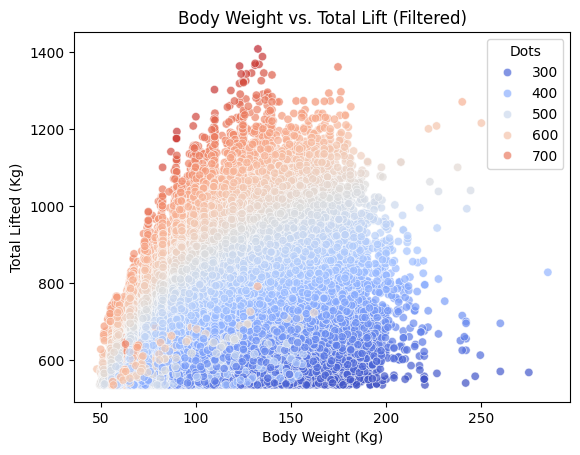

In [8]:
sns.scatterplot(data=elite_data, x='BodyweightKg', y='TotalKg', hue='Dots', palette='coolwarm', alpha=0.7)
plt.title('Body Weight vs. Total Lift (Filtered)')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.show()

That's better!

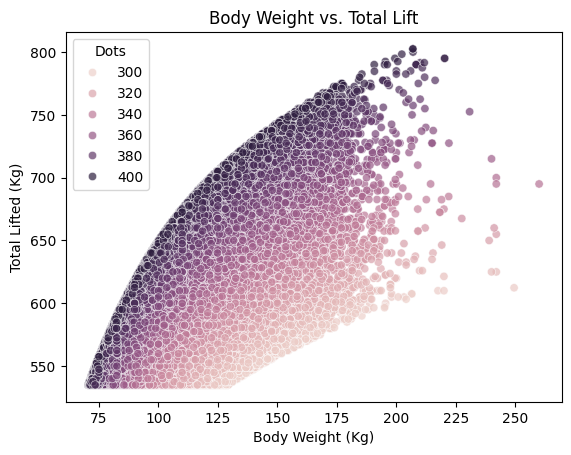

In [11]:
# Let's try seeing how the graph looks for each DOTS calculation

weak = elite_data[(elite_data['Dots'] >= 300) & (elite_data['Dots'] <= 400)]


sns.scatterplot(data=weak, x='BodyweightKg', y='TotalKg', hue='Dots', alpha=0.7)
plt.title('Body Weight vs. Total Lift')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.show()